In [21]:
import pandas as pd
import glob
import os
from bs4 import BeautifulSoup as b
from pyproj import Proj 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [119]:
turtles = pd.read_csv('output.csv',index_col='timestamp',parse_dates=['timestamp'])
turtles.index =pd.to_datetime(turtles.BaseName.str.split('_',expand=True)[1],format='%Y%m%dT%H%M%S')

In [142]:
turtles['zz']=(turtles.index - turtles.index[0]).total_seconds()*10

In [107]:
turtles.groupby(['group','BaseName']).count()

path_x  x  y  type  path_y  About  \
group BaseName                                                       
0     mbay_20181012T074016_1231       1  1  1     1       1      1   
      mbay_20181012T074018_1232       1  1  1     1       1      1   
      mbay_20181012T074021_1233       1  1  1     1       1      1   
1     mbay_20181012T074231_1283       1  1  1     1       1      1   
      mbay_20181012T074233_1284       1  1  1     1       1      1   
      mbay_20181012T074236_1285       1  1  1     1       1      1   
      mbay_20181012T074238_1286       1  1  1     1       1      1   
2     mbay_20181012T074425_1324       1  1  1     1       1      1   
      mbay_20181012T074428_1325       1  1  1     1       1      1   
      mbay_20181012T074430_1326       1  1  1     1       1      1   
      mbay_20181012T074433_1327       1  1  1     1       1      1   
3     mbay_20181012T074455_1335       1  1  1     1       1      1   
      mbay_20181012T074455_1336       1  1  1     1       1      1   
      mbay_20181012T074458_1337       1  1  1     1       1      1   
      mbay_20181012T074502_1338       1  1  1     1       1      1   
4     mbay_20181012T074538_1351       1  1  1     1       1      1   
      mbay_20181012T074540_1352       1  1  1     1       1      1   
5     mbay_20181012T074556_1355       1  1  1     1       1      1   
      mbay_20181012T074559_1356       2  2  2     2       2      2   
      mbay_20181012T074601_1357       2  2  2     2       2      2   
      mbay_20181012T074604_1358       2  2  2     2       2      2   
      mbay_20181012T074606_1359       1  1  1     1       1      1   
6     mbay_20181012T075120_1476       1  1  1     1       1      1   
      mbay_20181012T075122_1477       1  1  1     1       1      1   
      mbay_20181012T075127_1478       1  1  1     1       1      1   
7     mbay_20181012T075205_1489       1  1  1     1       1      1   
      mbay_20181012T075207_1490       1  1  1     1       1      1   
      mbay_20181012T075210_1491       1  1  1     1       1      1   
      mbay_20181012T075212_1492       1  1  1     1       1      1   
8     mbay_20181012T080844_1721       1  1  1     1       1      1   
...                                 ... .. ..   ...     ...    ...   
57    mbay_20181015T080854_4189       1  1  1     1       1      1   
      mbay_20181015T080856_4190       1  1  1     1       1      1   
      mbay_20181015T080859_4191       1  1  1     1       1      1   
58    mbay_20181015T081133_4249       1  1  1     1       1      1   
      mbay_20181015T081136_4250       1  1  1     1       1      1   
      mbay_20181015T081138_4251       1  1  1     1       1      1   
      mbay_20181015T081139_4252       1  1  1     1       1      1   
59    mbay_20181015T081205_4259       1  1  1     1       1      1   
      mbay_20181015T081208_4260       1  1  1     1       1      1   
      mbay_20181015T081210_4261       1  1  1     1       1      1   
      mbay_20181015T081213_4262       1  1  1     1       1      1   
60    mbay_20181015T081430_4315       1  1  1     1       1      1   
      mbay_20181015T081433_4316       1  1  1     1       1      1   
      mbay_20181015T081435_4317       1  1  1     1       1      1   
      mbay_20181015T081436_4318       1  1  1     1       1      1   
61    mbay_20181015T081709_4375       1  1  1     1       1      1   
      mbay_20181015T081710_4376       1  1  1     1       1      1   
      mbay_20181015T081712_4377       1  1  1     1       1      1   
      mbay_20181015T081714_4378       1  1  1     1       1      1   
62    mbay_20181015T081727_4383       1  1  1     1       1      1   
      mbay_20181015T081732_4384       3  3  3     3       3      3   
      mbay_20181015T081734_4385       2  2  2     2       2      2   
63    mbay_20181015T082449_4386       1  1  1     1       1      1   
      mbay_20181015T082453_4387       1  1  1     1       1      1   
64    mbay_20181015T082506_4388       1  1 

In [134]:
turtles['zz']

1
2018-10-12 07:40:16         0.0
2018-10-12 07:40:18         2.0
2018-10-12 07:40:21         5.0
2018-10-12 07:42:31       135.0
2018-10-12 07:42:33       137.0
2018-10-12 07:42:36       140.0
2018-10-12 07:42:38       142.0
2018-10-12 07:44:25       249.0
2018-10-12 07:44:28       252.0
2018-10-12 07:44:30       254.0
2018-10-12 07:44:33       257.0
2018-10-12 07:44:55       279.0
2018-10-12 07:44:55       279.0
2018-10-12 07:44:58       282.0
2018-10-12 07:45:02       286.0
2018-10-12 07:45:38       322.0
2018-10-12 07:45:40       324.0
2018-10-12 07:45:56       340.0
2018-10-12 07:45:59       343.0
2018-10-12 07:45:59       343.0
2018-10-12 07:46:01       345.0
2018-10-12 07:46:01       345.0
2018-10-12 07:46:04       348.0
2018-10-12 07:46:04       348.0
2018-10-12 07:46:06       350.0
2018-10-12 07:51:20       664.0
2018-10-12 07:51:22       666.0
2018-10-12 07:51:27       671.0
2018-10-12 07:52:05       709.0
2018-10-12 07:52:07       711.0
                         ...   
2018-1

In [102]:
def calc_turtle(group,distance=10):
    dist =np.power(np.power(group.iloc[0].xx -  group.xx,2) + np.power(group.iloc[0].yy -  group.yy,2),0.5)
    return {'x':np.mean(group[dist<distance].xx), 'y':np.mean(group[dist<distance].yy), 'km':max(dist>10)}

mp =turtles.groupby('group').apply(calc_turtle)
pd.DataFrame(list(mp))



,km,x,y
0,False,803202.432767,-2.431685e+06
1,False,802562.521950,-2.431522e+06
2,False,802958.727275,-2.431596e+06
3,False,803098.822850,-2.431621e+06
4,False,803295.922450,-2.431702e+06
5,True,803275.580950,-2.431644e+06
6,False,803258.145267,-2.431588e+06
7,False,803277.813650,-2.431533e+06
8,False,803102.073800,-2.431321e+06
9,False,803351.186150,-2.431388e+06


<IPython.core.display.Javascript object>


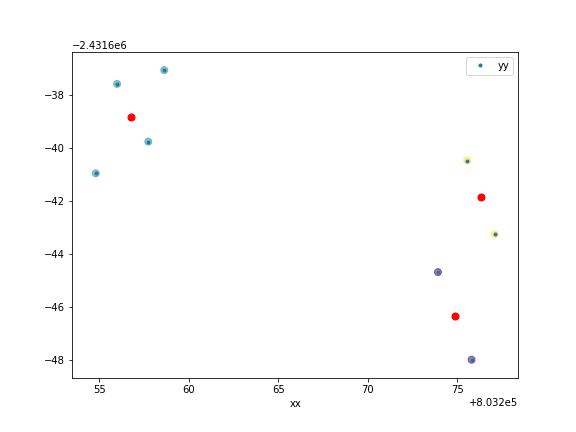

In [53]:
fig, ax = plt.subplots(figsize=(8,6))
turtles[turtles.group==5].plot(x='xx',y='yy',marker ='.',linestyle='',ax=ax);

In [147]:
g5 =turtles.loc[['xx','yy','zz']].copy()

In [148]:
g5['xx']  =g5['xx'] - g5['xx'].min()

In [150]:
g5['yy'] =g5['yy'] - g5['yy'].min()


In [160]:
g5['zz']=g5['zz']*100

<IPython.core.display.Javascript object>


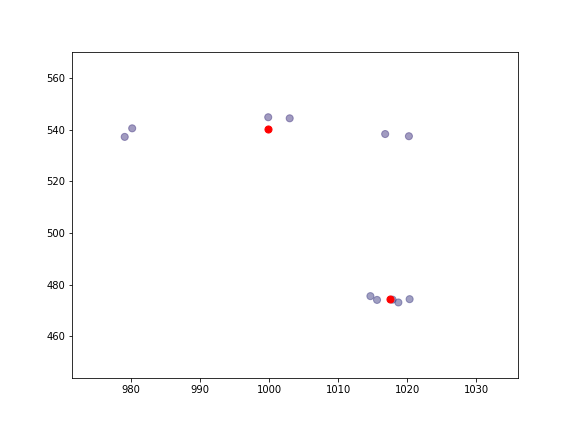

In [162]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100).fit(g5)
centroids = kmeans.cluster_centers_
#print(centroids);
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(g5['xx'], g5['yy'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50);

In [157]:
inert =[]
sil=[]
from sklearn.metrics import  silhouette_score
K =range(50,200)
for clust in  K:
    kmeans = KMeans(n_clusters=clust).fit(g5)
    cluster_labels = kmeans.fit_predict(g5)
    inert.append(kmeans.inertia_)
    #sil.append(silhouette_score(g5, cluster_labels))
    #print(kmeans.inertia_)

<IPython.core.display.Javascript object>


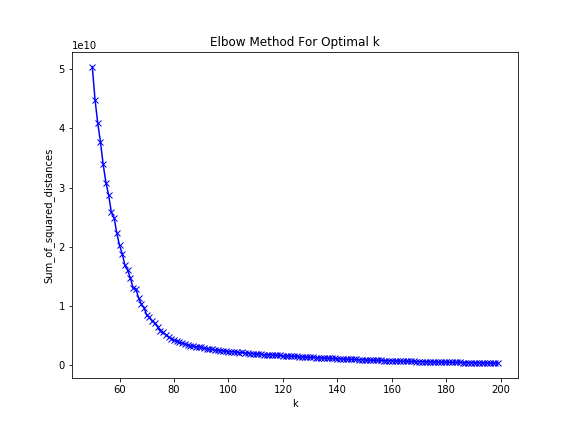

In [158]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(K, inert, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.metrics import  silhouette_score
silhouette_avg = 

In [85]:
list(range(1,3))

[1, 2]